#### Music Genre Classification Using Machine Learning
This project classifies audio files into 10 different genres using Mel-Frequency Cepstral Coefficients (MFCCs) and machine learning models. The dataset used is the GTZAN Music Genre Dataset. The project explores two models: a basic neural network and a tuned model with additional layers and regularization.

In [1079]:
import librosa
import os
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pickle
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.optimizers import Adam

Step 1: Data Exploration and Setup

In [1080]:
# Set the path to the genres folder
GENRE_DIR = 'C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres'

genres = os.listdir(GENRE_DIR)
print("Genres:", genres)

Genres: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [1081]:
GENRES = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
print("Genres:", GENRES)

Genres: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [1082]:
# Verify the Dataset Structure
for genre in GENRES:
    genre_path = os.path.join(GENRE_DIR, genre)
    if os.path.exists(genre_path):
        files = os.listdir(genre_path)
        print(f"{genre}: {len(files)} files found")
    else:
        print(f"{genre}: Folder does not exist!")

blues: 100 files found
classical: 100 files found
country: 100 files found
disco: 100 files found
hiphop: 100 files found
jazz: 100 files found
metal: 100 files found
pop: 100 files found
reggae: 100 files found
rock: 100 files found


In [1083]:
def display_mfcc(file_path, n_mfcc=20):
    """
    Computes and visualizes the MFCCs of an audio file.
    
    Parameters:
        file_path (str): Path to the audio file.
        n_mfcc (int): Number of MFCC coefficients to compute.
    """
    try:
        # Load the audio file
        y, sr = librosa.load(file_path, sr=None, mono=True)
        print(f"Processing: {file_path} | Audio Length: {len(y)} | Sample Rate: {sr}")
        
        # Compute MFCCs
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        print(f"MFCC Shape: {mfcc.shape}")
        
        # Visualize the MFCCs
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfcc, x_axis='time', sr=sr, cmap='coolwarm')
        plt.colorbar(label='MFCC Coefficient Value')
        plt.title(f'MFCCs for: {os.path.basename(file_path)}')
        plt.xlabel('Time (s)')
        plt.ylabel('MFCC Coefficients')
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

Displaying MFCCs for blues: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\blues\blues.00000.au
Processing: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\blues\blues.00000.au | Audio Length: 661794 | Sample Rate: 22050
MFCC Shape: (20, 1293)


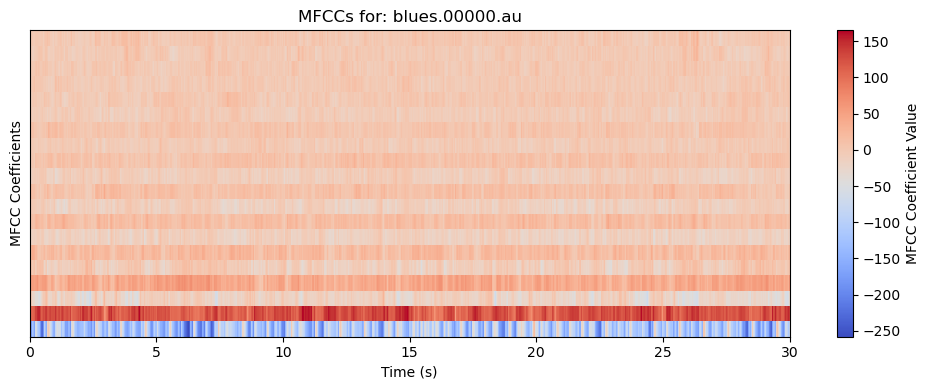

Displaying MFCCs for classical: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\classical\classical.00000.au
Processing: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\classical\classical.00000.au | Audio Length: 661794 | Sample Rate: 22050
MFCC Shape: (20, 1293)


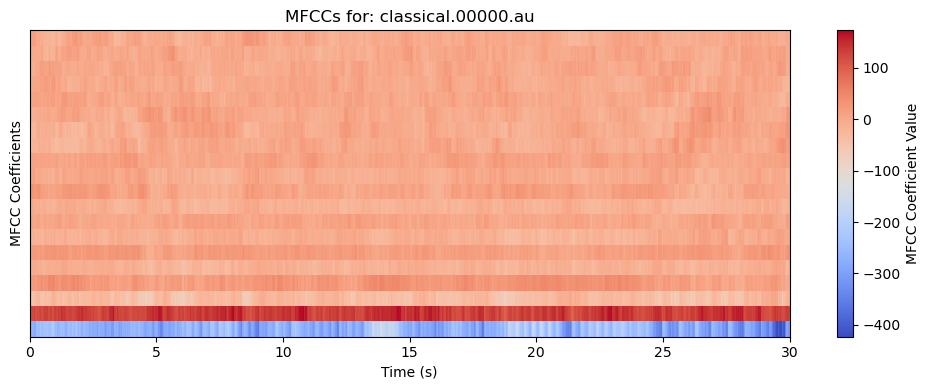

Displaying MFCCs for country: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\country\country.00000.au
Processing: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\country\country.00000.au | Audio Length: 663300 | Sample Rate: 22050
MFCC Shape: (20, 1296)


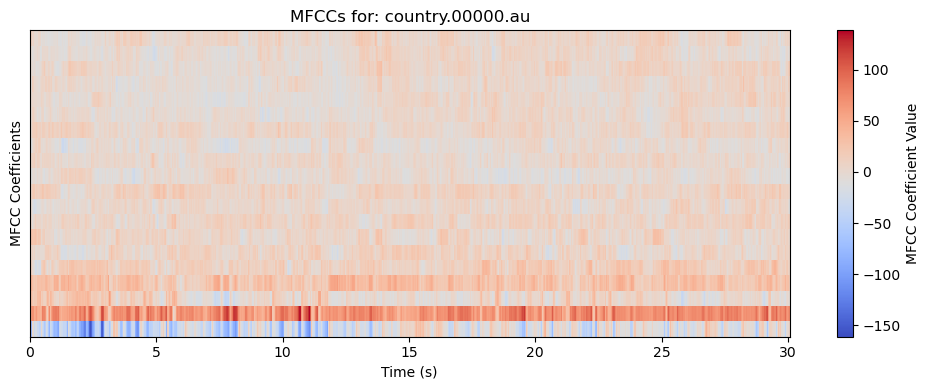

Displaying MFCCs for disco: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\disco\disco.00000.au
Processing: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\disco\disco.00000.au | Audio Length: 664180 | Sample Rate: 22050
MFCC Shape: (20, 1298)


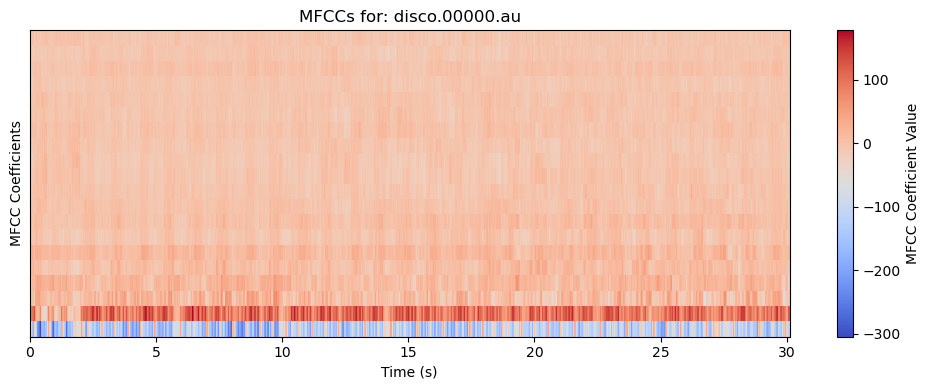

Displaying MFCCs for hiphop: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\hiphop\hiphop.00000.au
Processing: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\hiphop\hiphop.00000.au | Audio Length: 661504 | Sample Rate: 22050
MFCC Shape: (20, 1293)


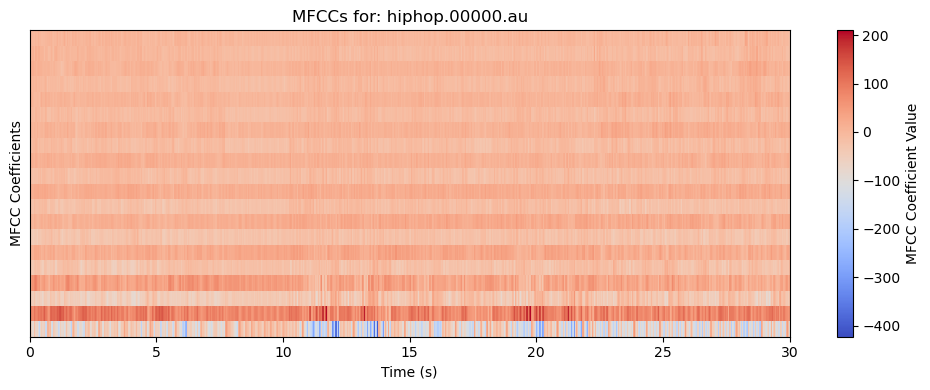

Displaying MFCCs for jazz: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\jazz\jazz.00000.au
Processing: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\jazz\jazz.00000.au | Audio Length: 661794 | Sample Rate: 22050
MFCC Shape: (20, 1293)


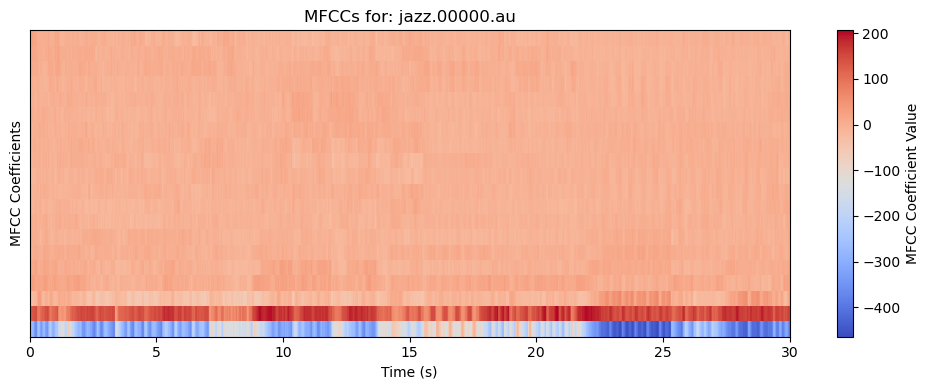

Displaying MFCCs for metal: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\metal\metal.00000.au
Processing: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\metal\metal.00000.au | Audio Length: 661504 | Sample Rate: 22050
MFCC Shape: (20, 1293)


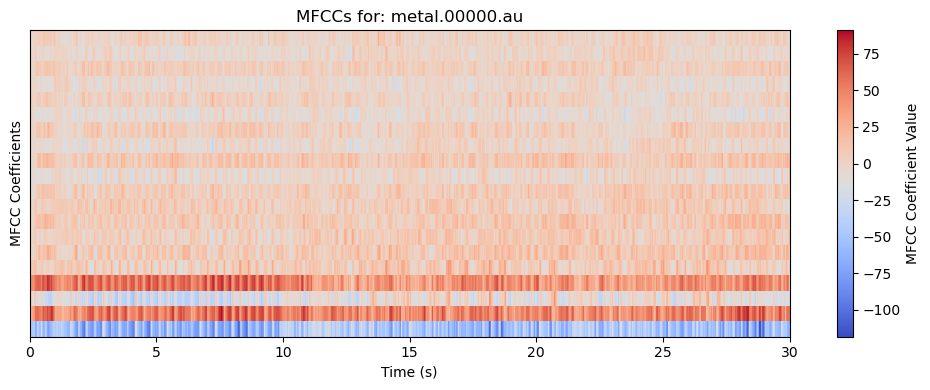

Displaying MFCCs for pop: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\pop\pop.00000.au
Processing: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\pop\pop.00000.au | Audio Length: 661504 | Sample Rate: 22050
MFCC Shape: (20, 1293)


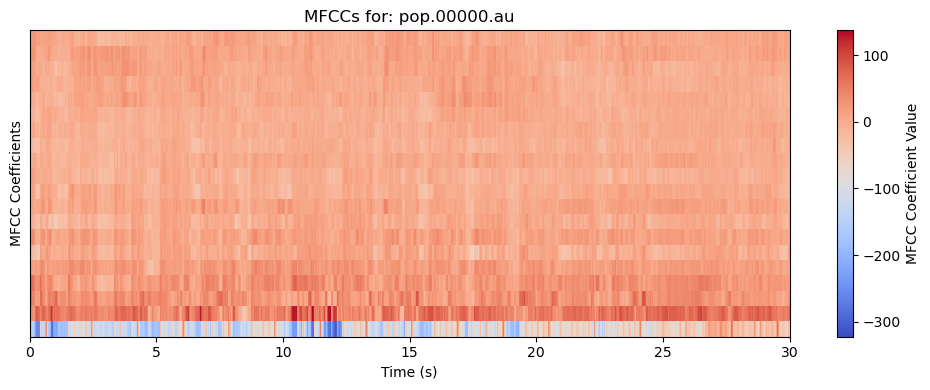

Displaying MFCCs for reggae: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\reggae\reggae.00000.au
Processing: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\reggae\reggae.00000.au | Audio Length: 661794 | Sample Rate: 22050
MFCC Shape: (20, 1293)


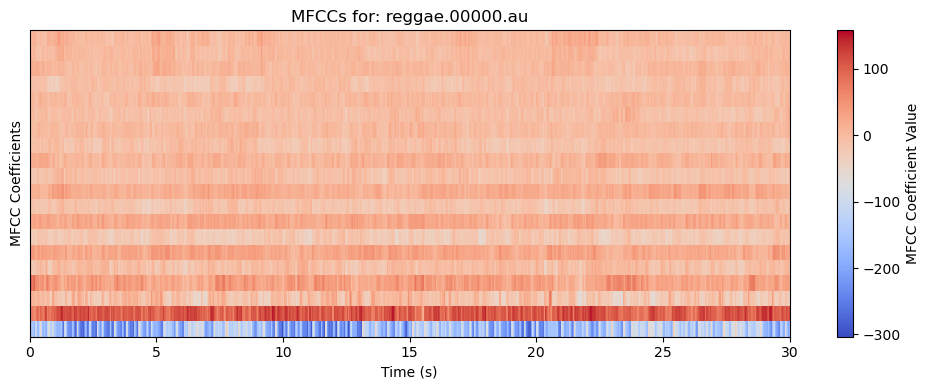

Displaying MFCCs for rock: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\rock\rock.00000.au
Processing: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\rock\rock.00000.au | Audio Length: 661794 | Sample Rate: 22050
MFCC Shape: (20, 1293)


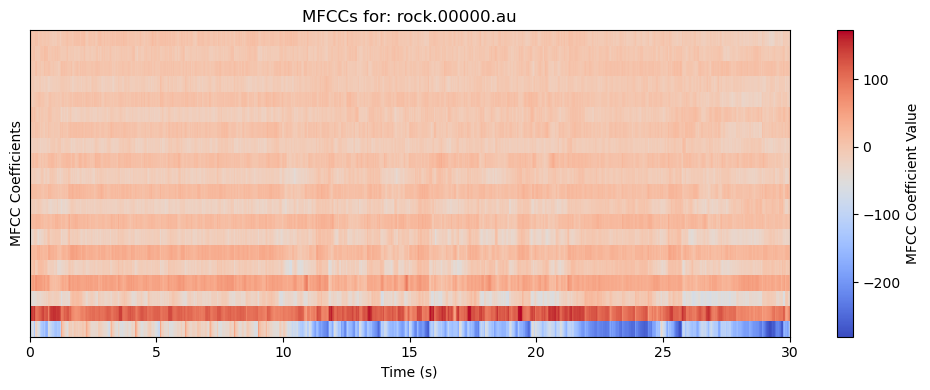

In [1084]:
for genre in GENRES:
    genre_path = os.path.join(GENRE_DIR, genre)
    file_list = os.listdir(genre_path)
    
    if file_list:  # Ensure the folder is not empty
        file_path = os.path.join(genre_path, file_list[0])  # Take the first file
        print(f"Displaying MFCCs for {genre}: {file_path}")
        display_mfcc(file_path)
    else:
        print(f"No files found in {genre_path}")


Step 2: Feature Extraction

In [1085]:
def extract_features_song(file_path, n_mfcc=13, target_length=25000):
    """
    Extracts features from an audio file and processes them into a fixed-length feature vector.
    
    Parameters:
        file_path (str): Path to the audio file.
        n_mfcc (int): Number of MFCC coefficients to extract. Defaults to 13.
        target_length (int): Target length of the feature vector. Defaults to 25,000.
        
    Returns:
        np.ndarray: Normalized, padded/truncated feature vector of fixed length.
    """
    try:
        # Load the audio file
        y, sr = librosa.load(file_path, sr=None, mono=True)
        print(f"Processing: {file_path} | Audio Length: {len(y)} | Sample Rate: {sr}")
        
        # Compute MFCCs (first 13 coefficients)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        print(f"MFCC Shape: {mfcc.shape}")
        
        # Flatten the MFCC matrix into a single feature vector
        mfcc_flat = mfcc.flatten()
        print(f"Flattened MFCC Shape: {mfcc_flat.shape}")
        
        # Normalize the vector values between -1 and 1
        mfcc_normalized = np.interp(mfcc_flat, (mfcc_flat.min(), mfcc_flat.max()), (-1, 1))
        
        # Pad or truncate the vector to the target length
        if len(mfcc_normalized) < target_length:
            mfcc_padded = np.pad(mfcc_normalized, (0, target_length - len(mfcc_normalized)), mode='constant')
        else:
            mfcc_padded = mfcc_normalized[:target_length]
        
        print(f"Final Feature Vector Shape: {mfcc_padded.shape}")
        return mfcc_padded
    
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None


In [1086]:
# Loop through genres and extract features for the first song in each genre
for genre in GENRES:
    genre_path = os.path.join(GENRE_DIR, genre)
    file_list = os.listdir(genre_path)
    
    if file_list:  # Ensure the folder is not empty
        file_path = os.path.join(genre_path, file_list[0])  # Take the first file
        print(f"\nExtracting features for {genre}: {file_path}")
        features = extract_features_song(file_path)
        if features is not None:
            print(f"Extracted Feature Vector (first 10 elements): {features[:10]}")
    else:
        print(f"No files found in {genre_path}")


Extracting features for blues: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\blues\blues.00000.au
Processing: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\blues\blues.00000.au | Audio Length: 661794 | Sample Rate: 22050
MFCC Shape: (13, 1293)
Flattened MFCC Shape: (16809,)
Final Feature Vector Shape: (25000,)
Extracted Feature Vector (first 10 elements): [-0.91825414 -0.77903744 -0.69715021 -0.60587158 -0.43046887 -0.36678471
 -0.43299423 -0.51855983 -0.56330827 -0.29301226]

Extracting features for classical: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\classical\classical.00000.au
Processing: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\classical\classical.00000.au | Audio Length: 661794 | Sample Rate: 22050
MFCC Shape: (13, 1293)
Flattened MFCC Shape: (16809,)
Final Feature Vector Shape: (25000,)
Extracted Feature Vec

In [1087]:
# Initialize a dictionary to store features for each genre
features_dict = {}

# Loop through genres and process files
for genre in GENRES:
    genre_path = os.path.join(GENRE_DIR, genre)
    file_list = os.listdir(genre_path)
    
    if file_list:  # Ensure the folder is not empty
        file_path = os.path.join(genre_path, file_list[0])  # Take the first file
        print(f"\nProcessing file for genre '{genre}': {file_path}")
        features = extract_features_song(file_path)
        if features is not None:
            features_dict[genre] = features  # Save features for the genre
            print(f"Features extracted and saved for genre '{genre}'.")
    else:
        print(f"No files found in genre folder: {genre_path}")

# Save the features dictionary to a file
with open('features.pkl', 'wb') as f:
    pickle.dump(features_dict, f)
    print("Features saved to 'features.pkl'.")


Processing file for genre 'blues': C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\blues\blues.00000.au
Processing: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\blues\blues.00000.au | Audio Length: 661794 | Sample Rate: 22050
MFCC Shape: (13, 1293)
Flattened MFCC Shape: (16809,)
Final Feature Vector Shape: (25000,)
Features extracted and saved for genre 'blues'.

Processing file for genre 'classical': C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\classical\classical.00000.au
Processing: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\classical\classical.00000.au | Audio Length: 661794 | Sample Rate: 22050
MFCC Shape: (13, 1293)
Flattened MFCC Shape: (16809,)
Final Feature Vector Shape: (25000,)
Features extracted and saved for genre 'classical'.

Processing file for genre 'country': C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyt

In [1088]:
# Extract features for a single file and print its shape
genre = GENRES[0]  # Example: Take the first genre ('blues')
genre_path = os.path.join(GENRE_DIR, genre)
file_list = os.listdir(genre_path)

if file_list:  # Ensure the folder is not empty
    file_path = os.path.join(genre_path, file_list[0])  # Take the first file
    print(f"\nVerifying feature extraction for {genre}: {file_path}")
    features = extract_features_song(file_path)
    if features is not None:
        print(f"Extracted Feature Vector Shape: {features.shape}")
        print(f"First 10 Elements of Feature Vector: {features[:10]}")
else:
    print(f"No files found in {genre_path}")


Verifying feature extraction for blues: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\blues\blues.00000.au
Processing: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\blues\blues.00000.au | Audio Length: 661794 | Sample Rate: 22050
MFCC Shape: (13, 1293)
Flattened MFCC Shape: (16809,)
Final Feature Vector Shape: (25000,)
Extracted Feature Vector Shape: (25000,)
First 10 Elements of Feature Vector: [-0.91825414 -0.77903744 -0.69715021 -0.60587158 -0.43046887 -0.36678471
 -0.43299423 -0.51855983 -0.56330827 -0.29301226]


Step 3: Generate Features and Labels

In [1089]:
def generate_features_and_labels(genre_dir, genres, n_mfcc=13, target_length=25000):
    """
    Generates features and one-hot encoded labels for all audio files in the dataset.

    Parameters:
        genre_dir (str): Path to the directory containing genre subfolders.
        genres (list): List of genre names (classes).
        n_mfcc (int): Number of MFCC coefficients to extract. Defaults to 13.
        target_length (int): Target length of the feature vector. Defaults to 25,000.

    Returns:
        features (np.ndarray): Numpy array of shape (num_songs, target_length).
        labels (np.ndarray): One-hot encoded labels of shape (num_songs, num_genres).
    """
    features = []
    labels = []

    genre_to_index = {genre: idx for idx, genre in enumerate(genres)}
    print(f"Genre to Index Mapping: {genre_to_index}")

    # Iterate through each genre folder
    for genre in genres:
        genre_path = os.path.join(genre_dir, genre)
        if not os.path.exists(genre_path):
            print(f"Genre folder not found: {genre}")
            continue

        # Process each file in the genre folder
        for file_name in os.listdir(genre_path):
            file_path = os.path.join(genre_path, file_name)
            try:
                # Extract features
                feature_vector = extract_features_song(file_path, n_mfcc=n_mfcc, target_length=target_length)
                if feature_vector is not None:
                    features.append(feature_vector)
                    labels.append(genre_to_index[genre])  # Append the genre's index as the label
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

    # Convert to numpy arrays
    features = np.array(features)
    labels = np.array(labels)

    # One-hot encode the labels
    one_hot_labels = to_categorical(labels, num_classes=len(genres))

    print(f"Features Shape: {features.shape}")
    print(f"Labels Shape: {one_hot_labels.shape}")

    return features, one_hot_labels

features, labels = generate_features_and_labels(GENRE_DIR, GENRES)

Genre to Index Mapping: {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
Processing: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\blues\blues.00000.au | Audio Length: 661794 | Sample Rate: 22050
MFCC Shape: (13, 1293)
Flattened MFCC Shape: (16809,)
Final Feature Vector Shape: (25000,)
Processing: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\blues\blues.00001.au | Audio Length: 661794 | Sample Rate: 22050
MFCC Shape: (13, 1293)
Flattened MFCC Shape: (16809,)
Final Feature Vector Shape: (25000,)
Processing: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classification/genres\blues\blues.00002.au | Audio Length: 661794 | Sample Rate: 22050
MFCC Shape: (13, 1293)
Flattened MFCC Shape: (16809,)
Final Feature Vector Shape: (25000,)
Processing: C:/Users/AJ/OneDrive/Desktop/school/AI/Jupyter/GTZAN Music Genre Classific

In [1090]:
# Print shapes to ensure correctness
print(f"Features Shape: {features.shape}")
print(f"Labels Shape: {labels.shape}")

Features Shape: (1000, 25000)
Labels Shape: (1000, 10)


In [1091]:
# Verify that the index_to_genre mapping exists and is correct
index_to_genre = {idx: genre for idx, genre in enumerate(GENRES)}
print(f"Index to Genre Mapping: {index_to_genre}")

# Display one example of one-hot encoded label per genre
seen_genres = set()
print("\nOne Example One-Hot Encoded Label Per Genre:")
for i in range(len(labels)):
    genre_index = np.argmax(labels[i])  # Get the index of the one-hot encoded label
    genre_name = index_to_genre.get(genre_index, "Unknown")
    if genre_name not in seen_genres:  # Check if the genre has already been displayed
        seen_genres.add(genre_name)
        print(f"Label: {labels[i]} -> Genre: {genre_name}")
        
    if len(seen_genres) == len(GENRES):  # Stop if all genres are displayed
        break

Index to Genre Mapping: {0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}

One Example One-Hot Encoded Label Per Genre:
Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] -> Genre: blues
Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] -> Genre: classical
Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] -> Genre: country
Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] -> Genre: disco
Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] -> Genre: hiphop
Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] -> Genre: jazz
Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] -> Genre: metal
Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] -> Genre: pop
Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] -> Genre: reggae
Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] -> Genre: rock


Step 4: Data Splitting

In [1092]:
# Create an array of indices
indices = np.arange(features.shape[0])

# Shuffle the indices randomly
np.random.shuffle(indices)

In [1093]:
# Define the proportion for training (e.g., 80%)
training_split = 0.8

# Calculate the split index
split_idx = int(training_split * len(features))

In [1094]:
# Divide indices into training and testing sets
train_indices, test_indices = indices[:split_idx], indices[split_idx:]

In [1095]:
# Use the indices to create training and testing sets
train_input, train_labels = features[train_indices], labels[train_indices]
test_input, test_labels = features[test_indices], labels[test_indices]

In [1096]:
# Print the shapes to ensure correct splitting
print(f"Training set shape: {train_input.shape}, {train_labels.shape}")
print(f"Testing set shape: {test_input.shape}, {test_labels.shape}")

Training set shape: (800, 25000), (800, 10)
Testing set shape: (200, 25000), (200, 10)


Step 5: Model Building

In [1097]:
# Build the model
model = Sequential([
    Input(shape=(25000,)),  # Input layer with feature vectors of size 25,000
    Dense(100, activation='relu'),  # Hidden layer with 100 neurons and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each genre) and softmax activation
])

In [1098]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',  # Loss function
    optimizer='adam',  # Optimizer
    metrics=['accuracy']  # Metric
)

In [1099]:
# Print the model summary
model.summary()

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_174 (Dense)           (None, 100)               2500100   
                                                                 
 dense_175 (Dense)           (None, 10)                1010      
                                                                 
Total params: 2,501,110
Trainable params: 2,501,110
Non-trainable params: 0
_________________________________________________________________


Step 6: Training the Model

In [1100]:
# Train the model
history = model.fit(
    train_input,  # Training features
    train_labels,  # Training labels
    epochs=10,  # Number of epochs
    batch_size=32,  # Batch size
    validation_split=0.2  # Use 20% of the training data for validation
)


Epoch 1/10
20/20 [==============================] - 1s 21ms/step - loss: 4.8245 - accuracy: 0.1656 - val_loss: 2.6550 - val_accuracy: 0.1625
Epoch 2/10
20/20 [==============================] - 0s 9ms/step - loss: 2.3515 - accuracy: 0.2547 - val_loss: 2.2813 - val_accuracy: 0.2375
Epoch 3/10
20/20 [==============================] - 0s 5ms/step - loss: 2.1543 - accuracy: 0.2625 - val_loss: 2.1142 - val_accuracy: 0.2875
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 1.9872 - accuracy: 0.2984 - val_loss: 2.3518 - val_accuracy: 0.2125
Epoch 5/10
20/20 [==============================] - 0s 5ms/step - loss: 1.8047 - accuracy: 0.3594 - val_loss: 2.0058 - val_accuracy: 0.3125
Epoch 6/10
20/20 [==============================] - 0s 5ms/step - loss: 1.7993 - accuracy: 0.3734 - val_loss: 2.2416 - val_accuracy: 0.2375
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 1.6929 - accuracy: 0.4094 - val_loss: 2.0542 - val_accuracy: 0.3187
Epoch 8/10
20/20 [=

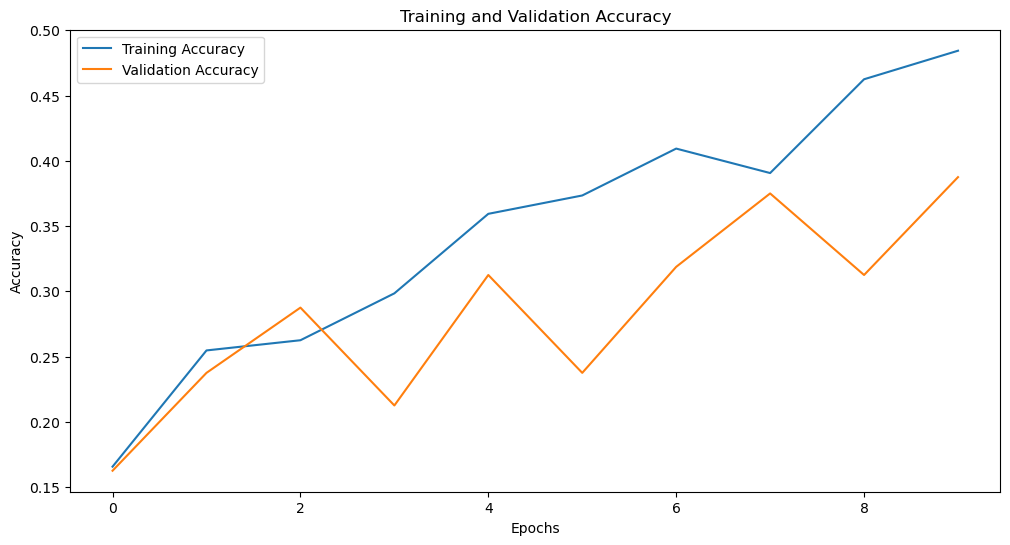

In [1101]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

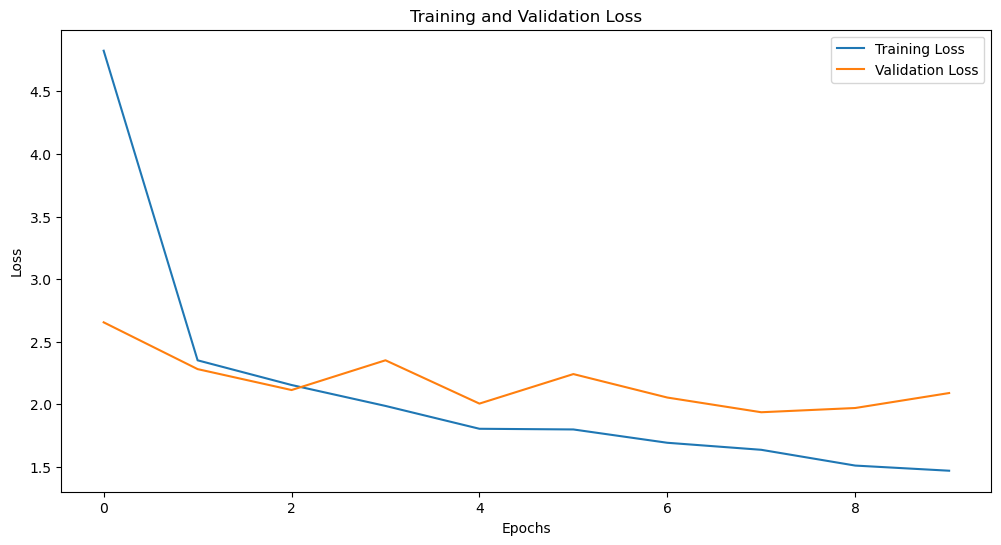

In [1102]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [1103]:
# Build the model
model_tune = Sequential([
    Input(shape=(25000,)),
    Dense(256, activation='relu', kernel_regularizer='l2'),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer='l2'),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer='l2'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [1104]:
# Compile the model
model_tune.compile(
    loss='categorical_crossentropy',  # Loss function
    optimizer=Adam(learning_rate=0.001),  # Optimizer with adjusted learning rate
    metrics=['accuracy']  # Metric
)

# Print model summary
model_tune.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_176 (Dense)           (None, 256)               6400256   
                                                                 
 dropout_87 (Dropout)        (None, 256)               0         
                                                                 
 dense_177 (Dense)           (None, 128)               32896     
                                                                 
 dropout_88 (Dropout)        (None, 128)               0         
                                                                 
 dense_178 (Dense)           (None, 64)                8256      
                                                                 
 dropout_89 (Dropout)        (None, 64)                0         
                                                                 
 dense_179 (Dense)           (None, 10)              

In [1105]:
history_tune = model_tune.fit(
    train_input,
    train_labels,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
20/20 [==============================] - 1s 14ms/step - loss: 9.5297 - accuracy: 0.1094 - val_loss: 6.9432 - val_accuracy: 0.1500
Epoch 2/50
20/20 [==============================] - 0s 7ms/step - loss: 6.5354 - accuracy: 0.1297 - val_loss: 5.8869 - val_accuracy: 0.1312
Epoch 3/50
20/20 [==============================] - 0s 7ms/step - loss: 5.5798 - accuracy: 0.1516 - val_loss: 5.0328 - val_accuracy: 0.2062
Epoch 4/50
20/20 [==============================] - 0s 6ms/step - loss: 4.8791 - accuracy: 0.1625 - val_loss: 4.6299 - val_accuracy: 0.2313
Epoch 5/50
20/20 [==============================] - 0s 6ms/step - loss: 4.4842 - accuracy: 0.2125 - val_loss: 4.2397 - val_accuracy: 0.2562
Epoch 6/50
20/20 [==============================] - 0s 7ms/step - loss: 4.2429 - accuracy: 0.1750 - val_loss: 3.9663 - val_accuracy: 0.2250
Epoch 7/50
20/20 [==============================] - 0s 6ms/step - loss: 3.9672 - accuracy: 0.1828 - val_loss: 3.8112 - val_accuracy: 0.2750
Epoch 8/50
20/20 [=

In [1106]:
# Report training and validation accuracy and loss over epochs
for epoch in range(len(history_tune.history['accuracy'])):
    print(f"Epoch {epoch + 1}:")
    print(f"  Training Loss: {history_tune.history['loss'][epoch]:.4f}, Training Accuracy: {history_tune.history['accuracy'][epoch]:.4f}")
    print(f"  Validation Loss: {history_tune.history['val_loss'][epoch]:.4f}, Validation Accuracy: {history_tune.history['val_accuracy'][epoch]:.4f}")

Epoch 1:
  Training Loss: 9.5297, Training Accuracy: 0.1094
  Validation Loss: 6.9432, Validation Accuracy: 0.1500
Epoch 2:
  Training Loss: 6.5354, Training Accuracy: 0.1297
  Validation Loss: 5.8869, Validation Accuracy: 0.1312
Epoch 3:
  Training Loss: 5.5798, Training Accuracy: 0.1516
  Validation Loss: 5.0328, Validation Accuracy: 0.2062
Epoch 4:
  Training Loss: 4.8791, Training Accuracy: 0.1625
  Validation Loss: 4.6299, Validation Accuracy: 0.2313
Epoch 5:
  Training Loss: 4.4842, Training Accuracy: 0.2125
  Validation Loss: 4.2397, Validation Accuracy: 0.2562
Epoch 6:
  Training Loss: 4.2429, Training Accuracy: 0.1750
  Validation Loss: 3.9663, Validation Accuracy: 0.2250
Epoch 7:
  Training Loss: 3.9672, Training Accuracy: 0.1828
  Validation Loss: 3.8112, Validation Accuracy: 0.2750
Epoch 8:
  Training Loss: 3.8026, Training Accuracy: 0.1969
  Validation Loss: 3.5798, Validation Accuracy: 0.2500
Epoch 9:
  Training Loss: 3.6505, Training Accuracy: 0.2266
  Validation Loss: 3

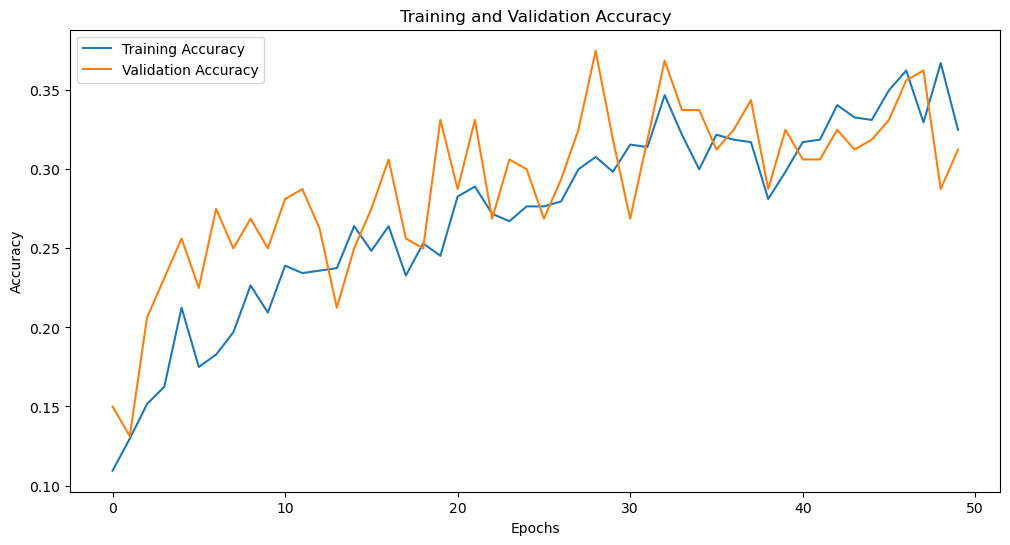

In [1107]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history_tune.history['accuracy'], label='Training Accuracy')
plt.plot(history_tune.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

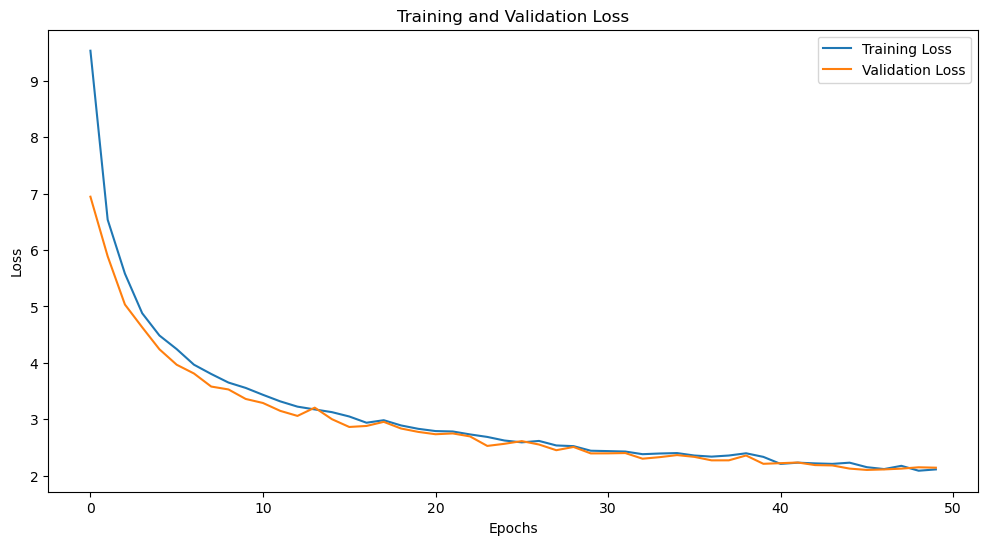

In [1108]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history_tune.history['loss'], label='Training Loss')
plt.plot(history_tune.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Step 7: Model Evaluation

In [1109]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_input, test_labels, verbose=1)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

7/7 [==============================] - 0s 3ms/step - loss: 1.9136 - accuracy: 0.4100
Test Loss: 1.9135507345199585
Test Accuracy: 0.4099999964237213


In [1110]:
# Evaluate the Model
test_loss_tune, test_accuracy_tune = model_tune.evaluate(test_input, test_labels, verbose=1)

print(f"Test Loss: {test_loss_tune:.4f}")
print(f"Test Accuracy: {test_accuracy_tune:.4f}")

7/7 [==============================] - 0s 3ms/step - loss: 2.1133 - accuracy: 0.3700
Test Loss: 2.1133
Test Accuracy: 0.3700


Step 8: Report

In [1111]:
# Report training and validation accuracy and loss over epochs
for epoch in range(len(history.history['accuracy'])):
    print(f"Epoch {epoch + 1}:")
    print(f"  Training Loss: {history.history['loss'][epoch]:.4f}, Training Accuracy: {history.history['accuracy'][epoch]:.4f}")
    print(f"  Validation Loss: {history.history['val_loss'][epoch]:.4f}, Validation Accuracy: {history.history['val_accuracy'][epoch]:.4f}")

Epoch 1:
  Training Loss: 4.8245, Training Accuracy: 0.1656
  Validation Loss: 2.6550, Validation Accuracy: 0.1625
Epoch 2:
  Training Loss: 2.3515, Training Accuracy: 0.2547
  Validation Loss: 2.2813, Validation Accuracy: 0.2375
Epoch 3:
  Training Loss: 2.1543, Training Accuracy: 0.2625
  Validation Loss: 2.1142, Validation Accuracy: 0.2875
Epoch 4:
  Training Loss: 1.9872, Training Accuracy: 0.2984
  Validation Loss: 2.3518, Validation Accuracy: 0.2125
Epoch 5:
  Training Loss: 1.8047, Training Accuracy: 0.3594
  Validation Loss: 2.0058, Validation Accuracy: 0.3125
Epoch 6:
  Training Loss: 1.7993, Training Accuracy: 0.3734
  Validation Loss: 2.2416, Validation Accuracy: 0.2375
Epoch 7:
  Training Loss: 1.6929, Training Accuracy: 0.4094
  Validation Loss: 2.0542, Validation Accuracy: 0.3187
Epoch 8:
  Training Loss: 1.6368, Training Accuracy: 0.3906
  Validation Loss: 1.9368, Validation Accuracy: 0.3750
Epoch 9:
  Training Loss: 1.5108, Training Accuracy: 0.4625
  Validation Loss: 1

In [1112]:
print(f"Final Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.4f}")

Final Test Loss: 1.9136
Final Test Accuracy: 0.4100


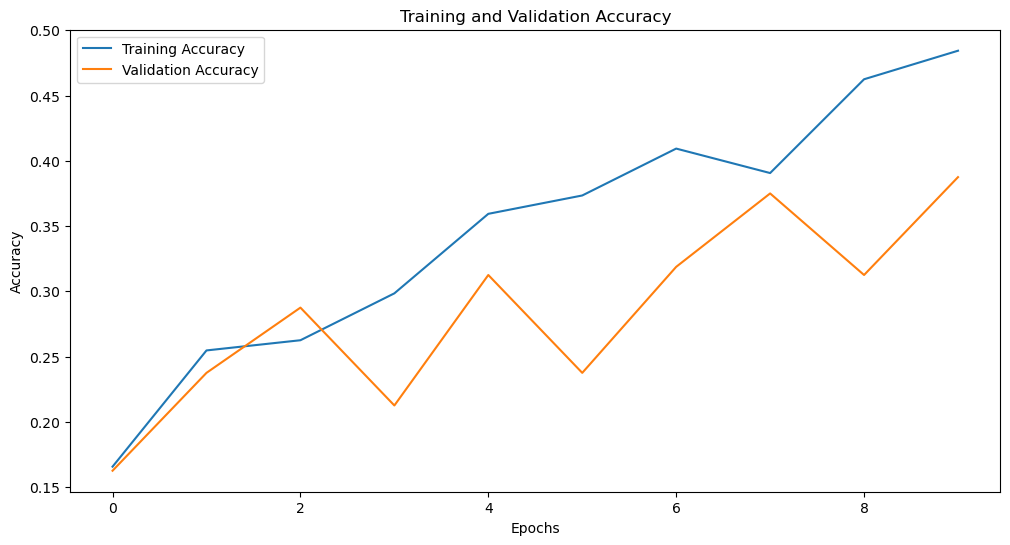

In [1113]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

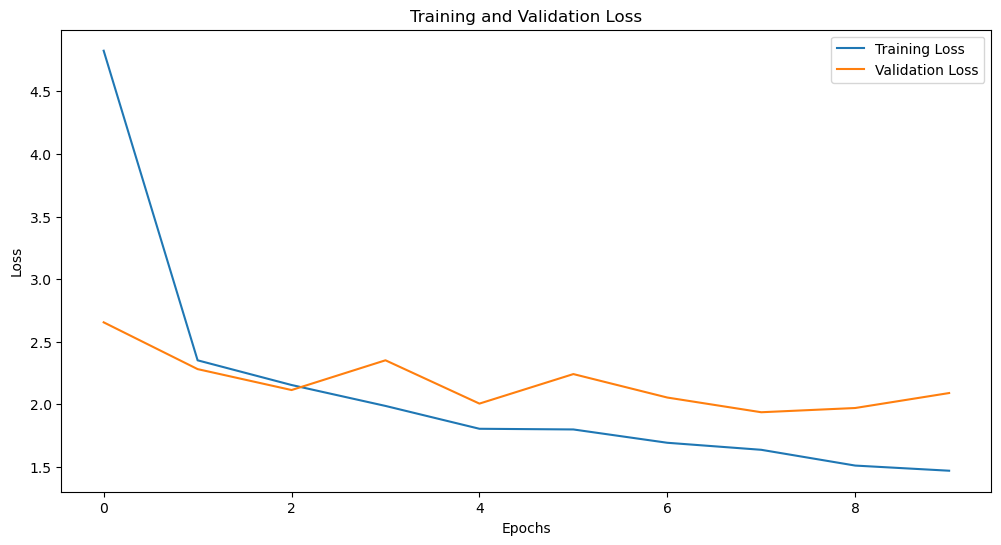

In [1114]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [1115]:
print("Comparison of Basic and Tuned Models:")
print(f"Basic Model Test Accuracy: {test_accuracy:.4f}")
print(f"Tuned Model Test Accuracy: {test_accuracy_tune:.4f}")

Comparison of Basic and Tuned Models:
Basic Model Test Accuracy: 0.4100
Tuned Model Test Accuracy: 0.3700


##### Conclusion

This project aimed to classify music genres using audio features and machine learning models. A basic model achieved a test accuracy of 41%, while a tuned model, which incorporated additional layers, L2 regularization, and dropout, achieved a test accuracy of 37%. Although tuning was not explicitly required, it was conducted to explore whether architectural adjustments and regularization could improve model performance.

One important observation is that the accuracy fluctuates slightly with each run due to inherent randomness in weight initialization, data shuffling during training, and other stochastic processes. Despite this, the general trend indicates that the basic model consistently performed better than the tuned model for this dataset and configuration.

For future improvements, reducing the dropout rate, adjusting regularization, and using data augmentation could enhance performance. Exploring advanced techniques like convolutional neural networks (CNNs) or transfer learning with pre-trained audio models might also improve results. In this experiment, the basic model is the better choice, but the tuned model shows potential for future optimization. Additionally, implementing strategies to stabilize the training process, such as fixing random seeds or using callbacks like early stopping, could help achieve more consistent results.